In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
     -                                        0.3/7.6 MB 7.1 MB/s eta 0:00:02
     ----                                     0.9/7.6 MB 9.6 MB/s eta 0:00:01
     -------                                  1.4/7.6 MB 10.2 MB/s eta 0:00:01
     ----------                               2.0/7.6 MB 10.6 MB/s eta 0:00:01
     ------------                             2.5/7.6 MB 10.5 MB/s eta 0:00:01
     ---------------                          2.9/7.6 MB 10.5 MB/s eta 0:00:01
     -----------------                        3.4/7.6 MB 10.4 MB/s eta 0:00:01
     --------------------                     4.0/7.6 MB 10.6 MB/s eta 0:00:01
     -----------------------                  4.5/7.6 MB 10.8 MB/s eta 0:00:01
     --------------------------               5.1/7.6 MB 10.8 MB/s eta 0:00:01
     -----------------------------            5.6/7.6 MB 10.9 MB/s eta 0:00:01
     -------------------------------          6.0/7.6 MB 10.6 

In [6]:
import tensorflow as tf  #텐서플로우를 tf 라는 이름으로 불러옴.
from tensorflow import keras #텐서플로우에서 keras를 불러옴.
import numpy as np
import matplotlib.pyplot as plt
 
#패션 MNIST 데이터를 kears의 데이터세트에서 불러옴.
fashion_mnist = keras.datasets.fashion_mnist
#학습용/테스트용으로 분리 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


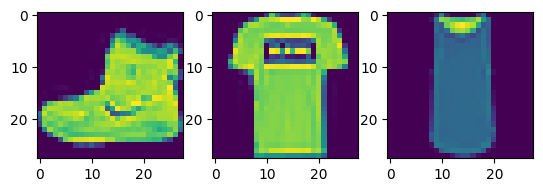

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])
plt.show()

In [16]:
train_labels[:3]

array([9, 0, 0], dtype=uint8)

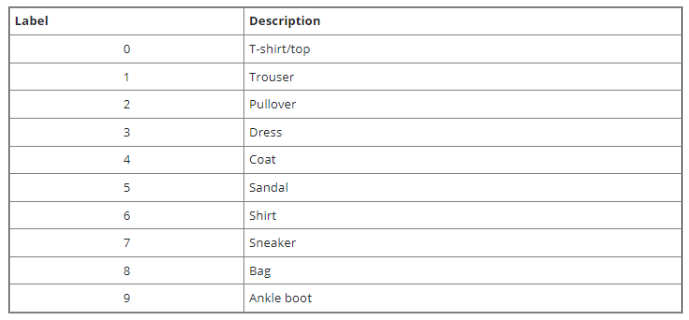

### 모델 생성

* Flatten 계층 : (28, 28)
* Dense 네트워크 : 출력 128, 활성화 방법 : ReLU
* Dense 네트워크 : 출력 10,  활성화 방법 : SoftMax

In [44]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')
])

In [18]:
model

### 오차를 측정하는 방법과 오차를 줄이는 방법 지정(최적화)

In [45]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

###  학습용 데이터와 정답을 주고 학습 실시

* epoch : 훈련 반복 횟수를 나타내는 인자

In [46]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3.6258 - accuracy: 0.6862
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7150 - accuracy: 0.7338
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6057 - accuracy: 0.7858
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8069
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5266 - accuracy: 0.8140
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5081 - accuracy: 0.8211
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5001 - accuracy: 0.8260
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4872 - accuracy: 0.8302
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4876 - accuracy: 0.8300
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.474

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.5143 - accuracy: 0.8150 - 410ms/epoch - 1ms/step

테스트 정확도: 0.8149999976158142


### 실제로 분류시켜보기

In [27]:
test_images.shape

(10000, 28, 28)

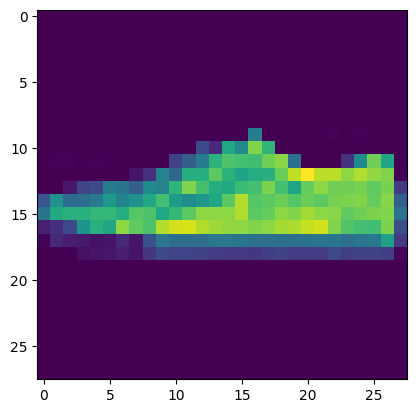

In [47]:
import numpy as np
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [48]:
yhat = model.predict(test_images[randIdx][np.newaxis, :, :])
print(yhat)

1/1 [==============================] - 0s 41ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.5326502e-32 0.0000000e+00
  1.2422658e-03 0.0000000e+00 9.9781227e-01 8.9124340e-05 8.5632625e-04]]


### 데이터를 드라이브에서 가져오기

In [60]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install opencv-python

                                              0.0/38.2 MB ? eta -:--:--
                                              0.4/38.2 MB 12.9 MB/s eta 0:00:03
                                              0.8/38.2 MB 10.2 MB/s eta 0:00:04
     -                                        1.3/38.2 MB 10.6 MB/s eta 0:00:04
     -                                        1.9/38.2 MB 10.7 MB/s eta 0:00:04
     --                                       2.2/38.2 MB 10.1 MB/s eta 0:00:04
     --                                       2.7/38.2 MB 10.0 MB/s eta 0:00:04
     ---                                      3.2/38.2 MB 10.2 MB/s eta 0:00:04
     ---                                      3.7/38.2 MB 10.4 MB/s eta 0:00:04
     ----                                     4.3/38.2 MB 10.5 MB/s eta 0:00:04
     -----                                    4.8/38.2 MB 10.6 MB/s eta 0:00:04
     -----                                    5.4/38.2 MB 10.7 MB/s eta 0:00:04
     ------                                   5.

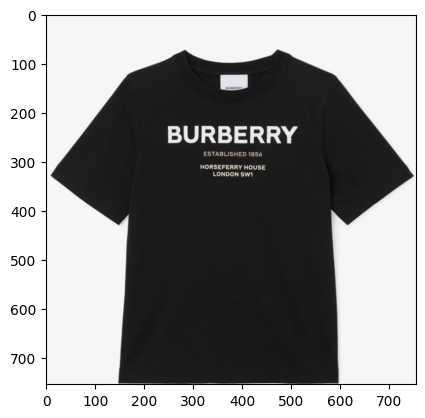

In [73]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
 
img = mpimg.imread('./sample.png')
plt.imshow(img)

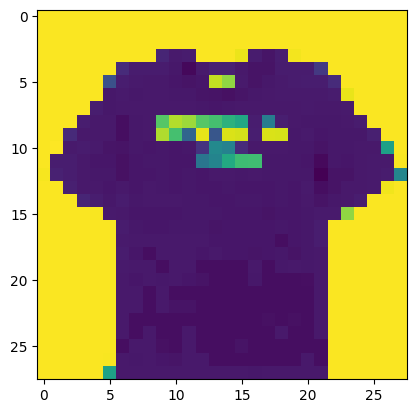

In [74]:
img = cv2.imread('./sample.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
plt.imshow(img)

In [75]:
input_data = img[np.newaxis, :, :]

class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 
shirt = np.argmax(model.predict(input_data))
print(class_names[shirt])

1/1 [==============================] - 0s 18ms/step
Ankle boot


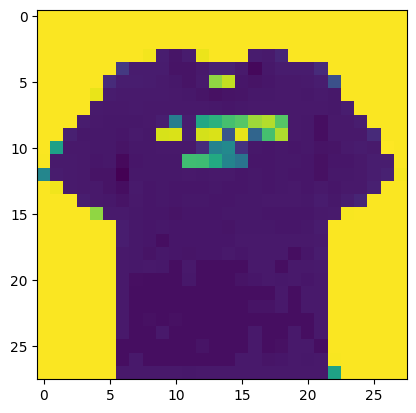

In [77]:
input_mirror = input_data[:,:, ::-1]
plt.imshow(input_mirror[0])

In [78]:
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
shirt = np.argmax(model.predict(input_mirror))
print(class_names[shirt])

1/1 [==============================] - 0s 16ms/step
Ankle boot


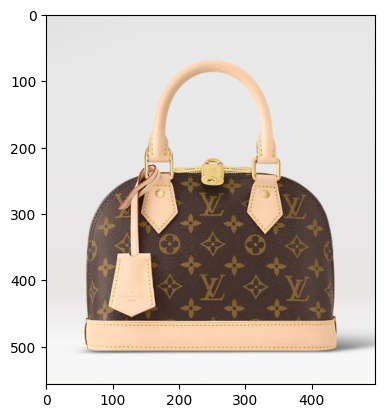

In [80]:
img2 = mpimg.imread('./sample2.png')
plt.imshow(img2)

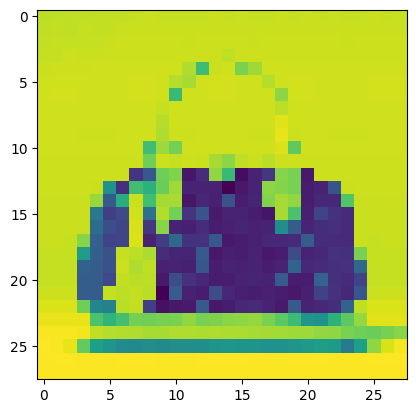

In [81]:
img2 = cv2.imread('./sample2.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (28, 28))
plt.imshow(img2)

In [82]:
input_data = img2[np.newaxis, :, :]

class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 
bag = np.argmax(model.predict(input_data))
print(class_names[bag])

1/1 [==============================] - 0s 16ms/step
Shirt


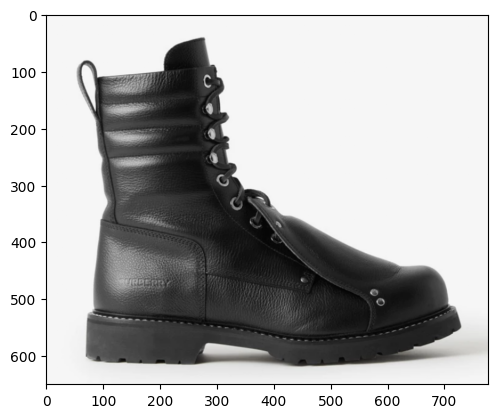

In [83]:
img3 = mpimg.imread('./sample3.png')
plt.imshow(img3)

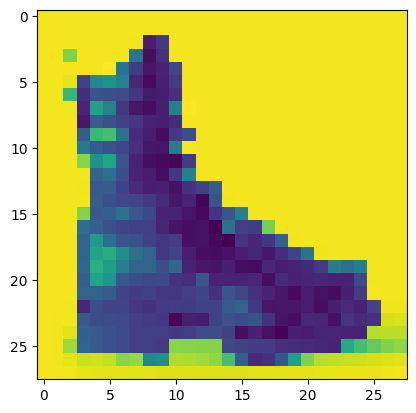

In [84]:
img3 = cv2.imread('./sample3.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.resize(img3, (28, 28))
plt.imshow(img3)